In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

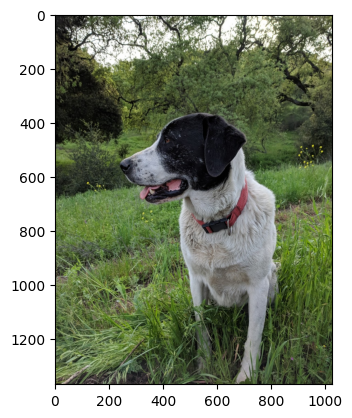

In [2]:
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

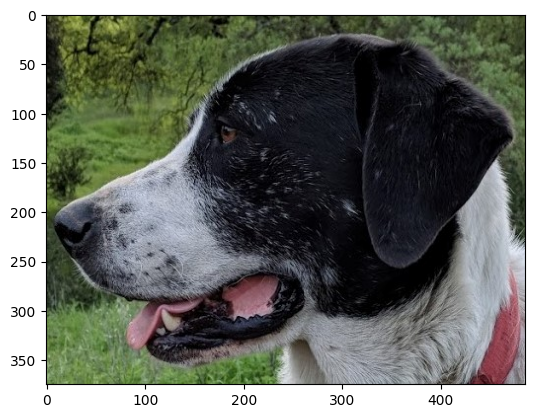

In [5]:
face = cv2.imread("../DATA/sammy_face.jpg")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

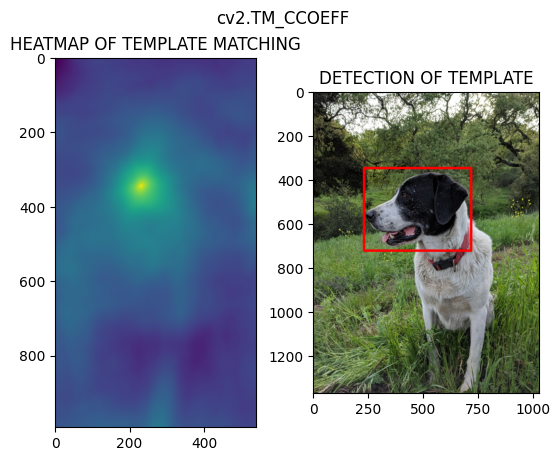

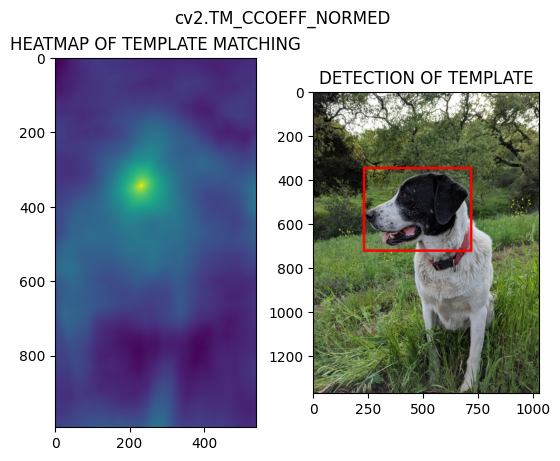

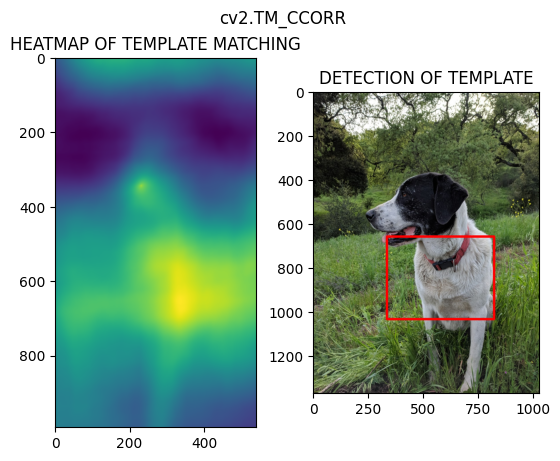

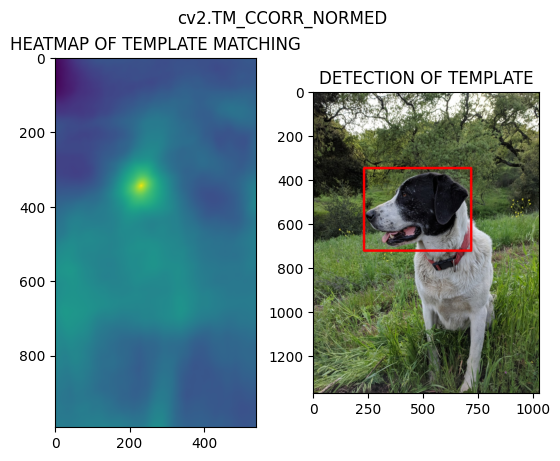

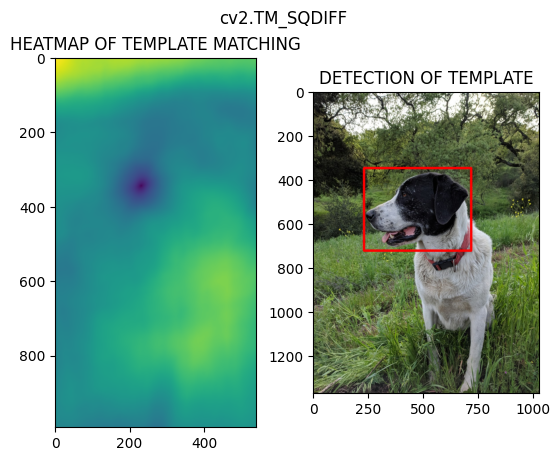

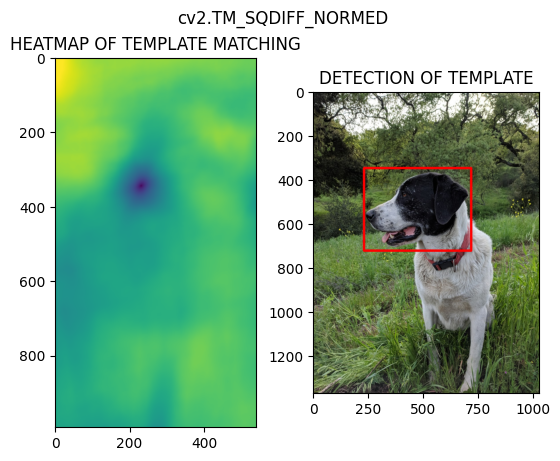

In [7]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for m in methods:
    full_copy = full.copy()
    method = eval(m)

    res = cv2.matchTemplate(full_copy, face, method) # res is a heatmap
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]: #TM_SQDIFF and TM_SQDIFF_NORMED are using minimum values
        top_left = min_loc
    else:
        top_left = max_loc

    height, width, channels = face.shape
    bottom_right = (top_left[0] + width, top_left[1] + height)

    cv2.rectangle(full_copy, top_left, bottom_right, (255, 0, 0), 10)
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    plt.suptitle(m)
    plt.show()
    print('\n')
    print('\n')